Using TensorFlow backend.


C:\Users\herma\Apps\master-thesis\src\utils
C:\Users\herma\Apps\master-thesis
Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT00

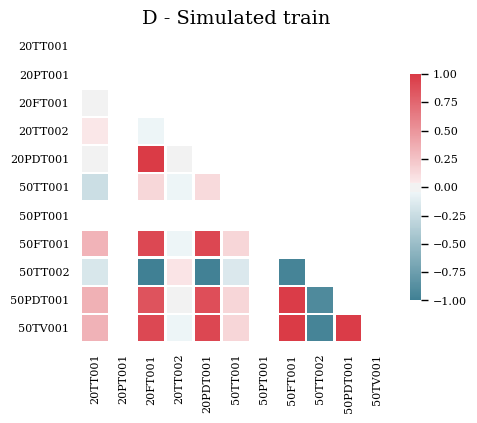

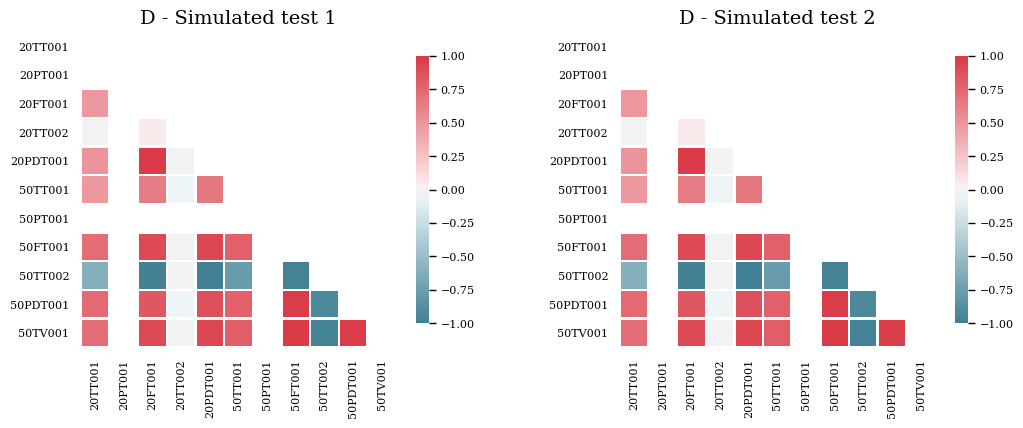

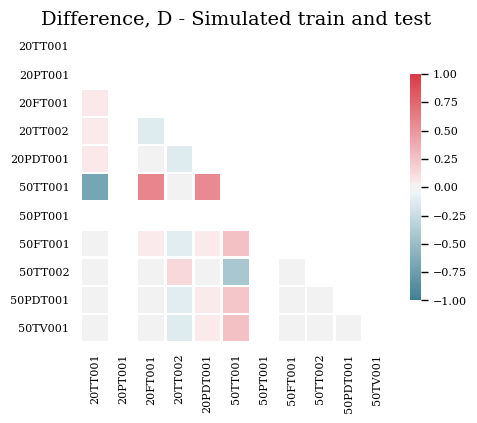

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y
Col. 2 : TIC0101_CA_YX
Col. 3 : TT0104_MA_Y
Col. 4 : TIC0103_CA_YX
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y
Col. 8 : PDT0119_MA_Y
Col. 9 : PDT0118_MA_Y
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y
Col. 13 : TT0652_MA_Y
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y
Col. 16 : TIC0103_CA_Y
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C temperatur inn
Col. 2 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 3 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 4 : TIC0425_CA_YX - Kald side temperatur inn
Col. 5 : TT0653_MA_Y - Kald side C temperatur ut
Col. 6 : TIC0105_CA_Y - Kald side C ventilåpning

Finding data between 2018-01-01 00:

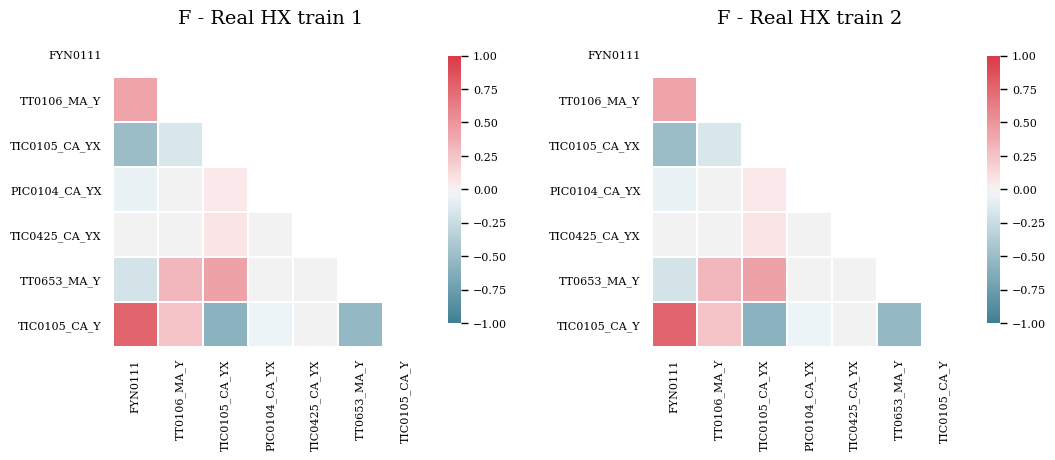

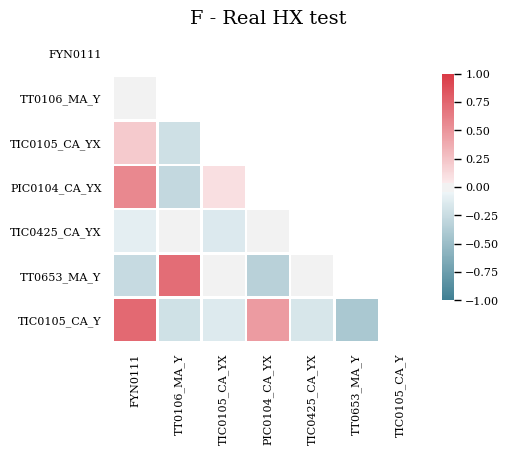

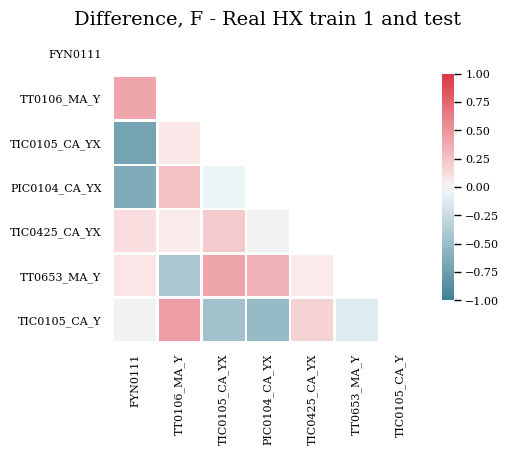

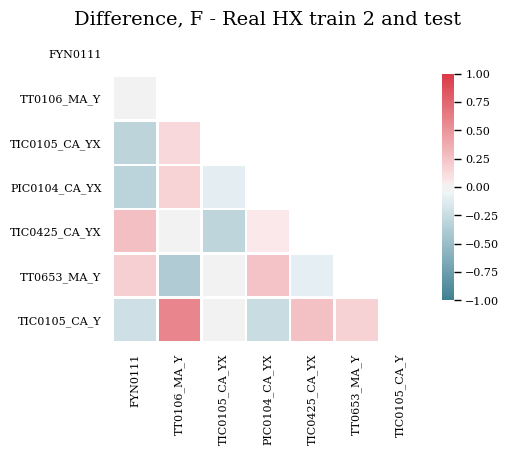

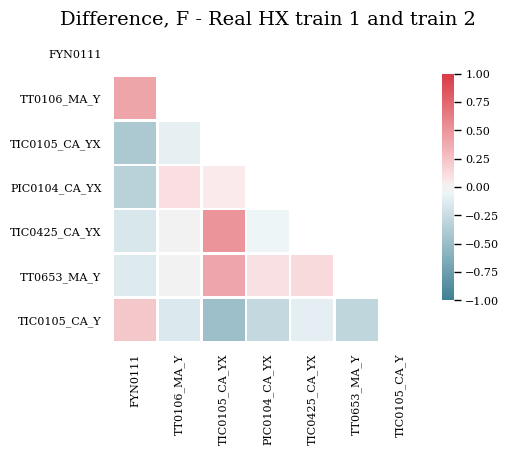

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 2374 rows

Finding d

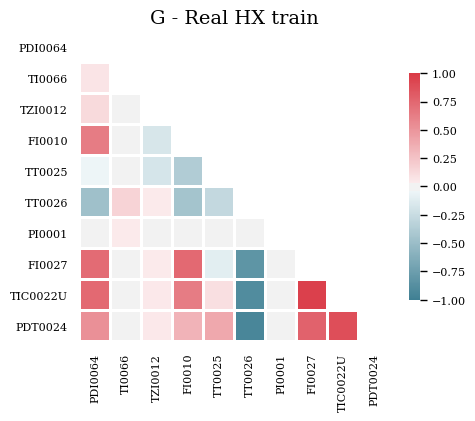

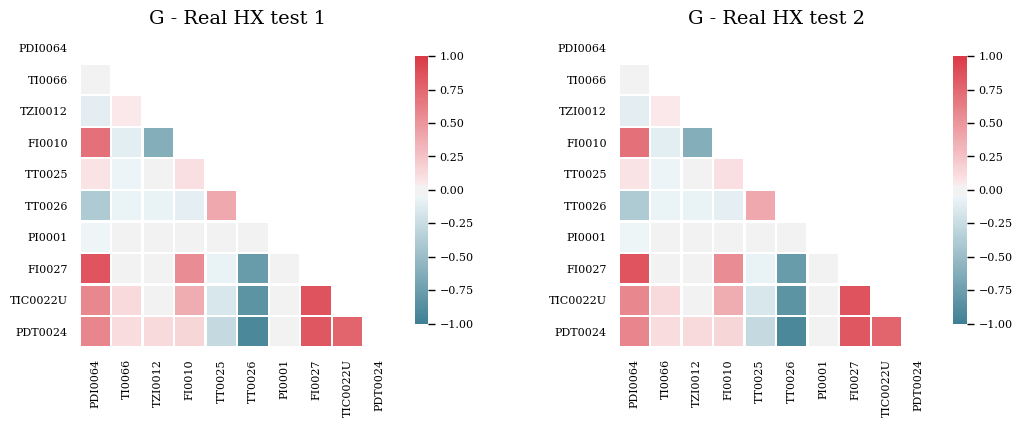

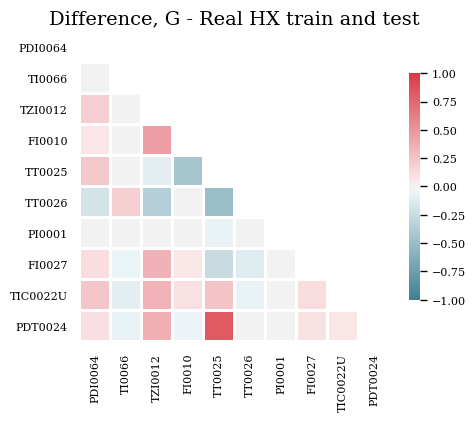

In [1]:
# %load example_correlation_plot.py
import pandas as pd
import src.core as mlApi

# 1. Define dataset specifics

# File path to dataset .csv file
filename = "../master-thesis-db/datasets/D/dataC.csv"

# A desired name for the dataset, used as plot titles
datasetName = "D - Simulated"

# List of columns on form ['name', 'desc', 'unit']
columns = [
    ['20TT001', 'Gas side inlet temperature', 'degrees'],
    ['20PT001', 'Gas side inlet pressure', 'barG'],
    ['20FT001', 'Gas side flow', 'M^3/s'],
    ['20TT002', 'Gas side outlet temperature', 'degrees'],
    ['20PDT001', 'Gas side pressure difference', 'bar'],
    ['50TT001', 'Cooling side inlet temperature', 'degrees'],
    ['50PT001', 'Cooling side inlet pressure', 'barG'],
    ['50FT001', 'Cooling side flow', 'M^3/s'],
    ['50TT002', 'Cooling side outlet temperature', 'degrees'],
    ['50PDT001', 'Cooling side pressure differential', 'bar'],
    ['50TV001', 'Cooling side valve opening', '%'],
]

# List of column names to ignore completely
irrelevantColumns = [

]

# List of training periods on form ['start', 'end']
traintime = [
    ["2020-01-01 00:00:00", "2020-04-01 00:00:00"],
]

# In this case, two separate testing phases are used
# This testtime parameter should cover the entire dataset
testtime = [
    "2020-01-01 00:00:00",
    "2020-08-01 00:00:00"
]

# This testtime1 parameter should cover the first testing phase
testtime1 = [
    "2020-04-15 00:00:00",
    "2020-05-04 00:00:00"
]

# This testtime2 parameter should cover the second testing phase
testtime2 = [
    "2020-06-01 00:00:00",
    "2020-06-16 00:00:00"
]

# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)
df_test_joined = pd.concat([df_test_1, df_test_2])

# 3. Plot correlation plots

mlApi.correlationPlot(df_train, datasetName + " train")
mlApi.correlationDuoPlot(df_test_1, df_test_2, datasetName + " test 1", datasetName + " test 2")
mlApi.correlationDifferencePlot(df_train, df_test_joined, "Difference, " + datasetName + " train and test")

# Reset to prepare for second dataset
# -------------------------------------
mlApi.reset()
# -------------------------------------

# 1. 

filename = "../master-thesis-db/datasets/F/data2_180min.csv"

datasetName = "F - Real HX"

columns = [
	['FYN0111', 'Gasseksport rate', 'MSm^3/d'],
	['TT0106_MA_Y', 'Varm side C temperatur inn', 'degrees'],
	['TIC0105_CA_YX', 'Varm side C temperatur ut', 'degrees'],
	['TI0115_MA_Y', 'Scrubber temperatur ut', 'degrees'],
	['PIC0104_CA_YX', 'Innløpsseparator trykk', 'Barg'],
	['TIC0425_CA_YX', 'Kald side temperatur inn', 'degrees'],
	['TT0653_MA_Y', 'Kald side C temperatur ut', 'degrees'],
	['TIC0105_CA_Y', 'Kald side C ventilåpning', '%'],
]

irrelevantColumns = [

]

# In this case, two training phases are used
# This should be the first training phase
traintime = [
        ["2018-01-01 00:00:00", "2018-08-01 00:00:00"],
    ]

# This should be the second training phase
traintime2 = [
	["2019-02-20 00:00:00", "2019-03-20 00:00:00"]
]

testtime = [
    "2018-12-01 00:00:00",
    "2019-02-01 00:00:00"
]

# 2.

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_train2, df_test2 = mlApi.getTestTrainSplit(traintime2, testtime)

# 3.

mlApi.correlationDuoPlot(df_train, df_train2, datasetName +" train 1", datasetName + " train 2")
mlApi.correlationPlot(df_test, datasetName + " test")
mlApi.correlationDifferencePlot(df_train, df_test, "Difference, " + datasetName + " train 1 and test")
mlApi.correlationDifferencePlot(df_train2, df_test, "Difference, " + datasetName + " train 2 and test")
mlApi.correlationDifferencePlot(df_train, df_train2, "Difference, " + datasetName + " train 1 and train 2")

# Reset to prepare for third dataset
# -------------------------------------
mlApi.reset()
# -------------------------------------

# 1. 

filename = "../master-thesis-db/datasets/G/data_60min.csv"

datasetName = "G - Real HX"

columns = [
	['PDI0064', 'Process side dP', 'bar'],
	['TI0066', 'Process side Temperature out','degrees'],
	['TZI0012', 'Process side Temperature in', 'degrees'],
	['FI0010', 'Process side flow rate', 'MSm^3/d(?)'],
	['TT0025', 'Cooling side Temperature in', 'degrees'],
	['TT0026', 'Cooling side Temperature out', 'degrees'],
	['PI0001', 'Cooling side Pressure in', 'barG'],
	['FI0027', 'Cooling side flow rate', 'MSm^3/d(?)'],
	['TIC0022U', 'Cooling side valve opening', '%'],
	['PDT0024', 'Cooling side dP', 'bar'],
]

irrelevantColumns = [

]

# As done for dataset D, two test phases are chosen

traintime = [
	["2019-04-10 00:00:00", "2019-08-01 00:00:00"]
]

testtime = [
	"2017-01-01 00:00:00",
	"2020-03-01 00:00:00",
]

testtime1 = [
    "2019-01-10 00:00:00",
    "2019-04-10 00:00:00"
]

testtime2 = [
    "2019-08-01 00:00:00",
    "2020-06-16 00:00:00"
]

# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)
df_test_joined = pd.concat([df_test_1, df_test_2])

# 3. Plot correlation plots

mlApi.correlationPlot(df_train, datasetName + " train")
mlApi.correlationDuoPlot(df_test_1, df_test_2, datasetName +" test 1", datasetName + " test 2")
mlApi.correlationDifferencePlot(df_train, df_test_joined, "Difference, " + datasetName + " train and test")
